# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [2]:
df = pd.read_excel("Call_Volume_Trend_Analysis_Project_9.xlsx")
df

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,2022-01-01 09:02:38,9,9_10,00:01:36,96,answered,Agent,YES,00:00:16
1,Executives 4,1000004.0,80595XXXXX,0,2022-01-01 09:02:40,9,9_10,00:02:20,140,answered,Agent,YES,00:00:26
2,Executives 65,1000065.0,70202XXXXX,0,2022-01-01 09:02:49,9,9_10,00:01:25,85,answered,AutoWrapped,YES,00:00:16
3,Executives 55,1000055.0,96104XXXXX,1,2022-01-01 09:02:51,9,9_10,00:01:31,91,answered,Agent,YES,00:00:25
4,Executives 21,1000021.0,82001XXXXX,0,2022-01-01 09:02:55,9,9_10,00:02:45,165,answered,Agent,YES,00:00:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117983,Executives 7,1000007.0,85399XXXXX,62,2022-01-23 20:57:58,20,20_21,00:01:32,92,answered,Agent,YES,00:00:42
117984,Executives 36,1000036.0,88397XXXXX,22,2022-01-23 20:58:24,20,20_21,00:01:14,74,answered,Agent,YES,00:00:15
117985,Executives 48,1000048.0,70035XXXXX,14,2022-01-23 20:58:34,20,20_21,00:01:48,108,answered,Agent,YES,00:00:23
117986,Executives 33,1000033.0,87773XXXXX,26,2022-01-23 20:58:53,20,20_21,00:01:13,73,answered,Agent,YES,00:01:05


In [3]:
df.head(8)

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,2022-01-01 09:02:38,9,9_10,00:01:36,96,answered,Agent,YES,00:00:16
1,Executives 4,1000004.0,80595XXXXX,0,2022-01-01 09:02:40,9,9_10,00:02:20,140,answered,Agent,YES,00:00:26
2,Executives 65,1000065.0,70202XXXXX,0,2022-01-01 09:02:49,9,9_10,00:01:25,85,answered,AutoWrapped,YES,00:00:16
3,Executives 55,1000055.0,96104XXXXX,1,2022-01-01 09:02:51,9,9_10,00:01:31,91,answered,Agent,YES,00:00:25
4,Executives 21,1000021.0,82001XXXXX,0,2022-01-01 09:02:55,9,9_10,00:02:45,165,answered,Agent,YES,00:00:23
5,NaN,NaN,96424XXXXX,13,2022-01-01 09:04:19,9,9_10,00:00:00,0,abandon,NaN,YES,00:00:16
6,Executives 55,1000055.0,96737XXXXX,79,2022-01-01 09:04:23,9,9_10,00:01:25,85,answered,AutoWrapped,YES,00:00:13
7,NaN,NaN,96392XXXXX,60,2022-01-01 09:04:43,9,9_10,00:00:00,0,abandon,NaN,YES,00:00:17


In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
# Separate numerical and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# Impute NaN values in numerical columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Impute NaN values in categorical columns with mode
for col in categorical_columns:
    mode_value = df[col].mode().iloc[0]
    df[col].fillna(mode_value, inplace=True)

print(df)

           Agent_Name   Agent_ID Customer_Phone_No  Queue_Time(Secs)  \
0       Executives 42  1000042.0        98502XXXXX               2.0   
1        Executives 4  1000004.0        80595XXXXX               0.0   
2       Executives 65  1000065.0        70202XXXXX               0.0   
3       Executives 55  1000055.0        96104XXXXX               1.0   
4       Executives 21  1000021.0        82001XXXXX               0.0   
...               ...        ...               ...               ...   
117983   Executives 7  1000007.0        85399XXXXX              62.0   
117984  Executives 36  1000036.0        88397XXXXX              22.0   
117985  Executives 48  1000048.0        70035XXXXX              14.0   
117986  Executives 33  1000033.0        87773XXXXX              26.0   
117987  Executives 58  1000058.0        83800XXXXX               5.0   

               Date_&_Time  Time Time_Bucket Duration(hh:mm:ss)  \
0      2022-01-01 09:02:38   9.0        9_10           00:01:36   
1

# Missing values handling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117988 entries, 0 to 117987
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Agent_Name          117988 non-null  object        
 1   Agent_ID            117988 non-null  float64       
 2   Customer_Phone_No   117988 non-null  object        
 3   Queue_Time(Secs)    117988 non-null  float64       
 4   Date_&_Time         117988 non-null  datetime64[ns]
 5   Time                117988 non-null  float64       
 6   Time_Bucket         117988 non-null  object        
 7   Duration(hh:mm:ss)  117988 non-null  object        
 8   Call_Seconds (s)    117988 non-null  float64       
 9   Call_Status         117988 non-null  object        
 10  Wrapped _By         117988 non-null  object        
 11  Ringing             117988 non-null  object        
 12  IVR _Duration       117988 non-null  object        
dtypes: datetime64[ns](1), float64

In [6]:
df.isnull().sum()

Agent_Name            0
Agent_ID              0
Customer_Phone_No     0
Queue_Time(Secs)      0
Date_&_Time           0
Time                  0
Time_Bucket           0
Duration(hh:mm:ss)    0
Call_Seconds (s)      0
Call_Status           0
Wrapped _By           0
Ringing               0
IVR _Duration         0
dtype: int64

In [7]:
df.columns

Index(['Agent_Name', 'Agent_ID', 'Customer_Phone_No', 'Queue_Time(Secs)',
       'Date_&_Time', 'Time', 'Time_Bucket', 'Duration(hh:mm:ss)',
       'Call_Seconds (s)', 'Call_Status', 'Wrapped _By', 'Ringing',
       'IVR _Duration'],
      dtype='object')

# Average Call Duration:

In [8]:

# Convert 'Date_&_Time' to datetime format and create 'Hourly_Bucket'
df['Date_&_Time'] = pd.to_datetime(df['Date_&_Time'])
df['Hourly_Bucket'] = df['Date_&_Time'].dt.hour
df['Hourly_Bucket'] = df['Hourly_Bucket'].astype(str) + '-' + (df['Hourly_Bucket'] + 1).astype(str)

# Convert 'Duration(hh:mm:ss)' to string and then to timedelta
df['Call_Seconds'] = pd.to_timedelta(df['Duration(hh:mm:ss)'].astype(str)).dt.total_seconds()

# Group data by 'Hourly_Bucket' and calculate average call duration
average_duration_hourly = df.groupby('Hourly_Bucket')['Call_Seconds'].mean().reset_index()

# Define the order of time buckets to ensure '9-10' appears first
time_bucket_order = ['9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22']

# Sort the average_duration_hourly DataFrame based on the custom order
average_duration_hourly['Hourly_Bucket'] = pd.Categorical(average_duration_hourly['Hourly_Bucket'], categories=time_bucket_order, ordered=True)
average_duration_hourly = average_duration_hourly.sort_values('Hourly_Bucket')

# Print average call durations in numeric form
print("Average Call Durations (in seconds):")
for index, row in average_duration_hourly.iterrows():
    print(f"{row['Hourly_Bucket']}: {row['Call_Seconds']} seconds")



Average Call Durations (in seconds):
9-10: 92.01032540675845 seconds
10-11: 97.4240216329903 seconds
11-12: 116.78374128264734 seconds
12-13: 144.72502371166615 seconds
13-14: 149.54095666464838 seconds
14-15: 146.96932108701827 seconds
15-16: 169.8968227972486 seconds
16-17: 181.43934911242604 seconds
17-18: 179.72451370986641 seconds
18-19: 174.32467532467533 seconds
19-20: 144.58254680488938 seconds
20-21: 106.62627574689182 seconds
21-22: 74.49137931034483 seconds


In [9]:

# Convert 'Date_&_Time' to datetime format
df['Date_&_Time'] = pd.to_datetime(df['Date_&_Time'])

# Create a new column 'Hourly_Bucket' to represent the time buckets
df['Hourly_Bucket'] = df['Date_&_Time'].dt.hour

# If you want to represent time buckets as 1-2, 2-3, etc.
# Adjust the Hourly_Bucket values accordingly
df['Hourly_Bucket'] = df['Hourly_Bucket'].astype(str) + '-' + (df['Hourly_Bucket'] + 1).astype(str)

# Now, 'Hourly_Bucket' contains the time buckets you've created
print("Hourly Buckets:")
print(df['Hourly_Bucket'].unique())

Hourly Buckets:
['9-10' '10-11' '11-12' '12-13' '13-14' '14-15' '15-16' '16-17' '17-18'
 '18-19' '19-20' '20-21' '21-22']


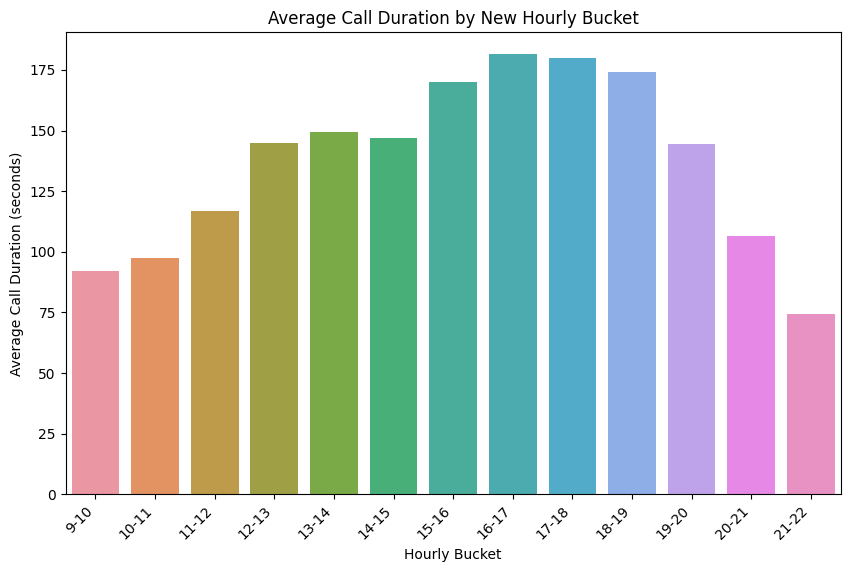

In [10]:
# Convert 'Date_&_Time' to datetime format and create 'Hourly_Bucket'
df['Date_&_Time'] = pd.to_datetime(df['Date_&_Time'])
df['Hourly_Bucket'] = df['Date_&_Time'].dt.hour
df['Hourly_Bucket'] = df['Hourly_Bucket'].astype(str) + '-' + (df['Hourly_Bucket'] + 1).astype(str)

# Convert 'Duration(hh:mm:ss)' to string and then to timedelta
df['Call_Seconds'] = pd.to_timedelta(df['Duration(hh:mm:ss)'].astype(str)).dt.total_seconds()

# Group data by 'Hourly_Bucket' and calculate average call duration
average_duration_hourly = df.groupby('Hourly_Bucket')['Call_Seconds'].mean().reset_index()

time_bucket_order = ['9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22']

# Visualize the results using a bar plot for the new 'Hourly_Bucket'
plt.figure(figsize=(10, 6))
sns.barplot(x='Hourly_Bucket', y='Call_Seconds', data=average_duration_hourly, order=time_bucket_order)
plt.title('Average Call Duration by New Hourly Bucket')
plt.xlabel('Hourly Bucket')
plt.ylabel('Average Call Duration (seconds)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Call Volume Analysis

In [11]:
# Convert 'Date_&_Time' to datetime format and create 'Hourly_Bucket'
df['Date_&_Time'] = pd.to_datetime(df['Date_&_Time'])
df['Hourly_Bucket'] = df['Date_&_Time'].dt.hour
df['Hourly_Bucket'] = df['Hourly_Bucket'].astype(str) + '-' + (df['Hourly_Bucket'] + 1).astype(str)

# Group data by 'Hourly_Bucket' and count the total number of calls in each time bucket
hourly_call_volume = df.groupby('Hourly_Bucket')['Call_Status'].count().reset_index()

# Define the order of time buckets to ensure '9-10' appears first
time_bucket_order = ['9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22']

# Sort the hourly_call_volume DataFrame based on the custom order
hourly_call_volume['Hourly_Bucket'] = pd.Categorical(hourly_call_volume['Hourly_Bucket'], categories=time_bucket_order, ordered=True)
hourly_call_volume = hourly_call_volume.sort_values('Hourly_Bucket')

# Print the numeric values for hourly call volume
print("Hourly Call Volume (Numeric):")
for index, row in hourly_call_volume.iterrows():
    print(f"{row['Hourly_Bucket']}: {row['Call_Status']} calls")

Hourly Call Volume (Numeric):
9-10: 9588 calls
10-11: 13313 calls
11-12: 14626 calls
12-13: 12652 calls
13-14: 11561 calls
14-15: 10561 calls
15-16: 9159 calls
16-17: 8788 calls
17-18: 8534 calls
18-19: 7238 calls
19-20: 6463 calls
20-21: 5389 calls
21-22: 116 calls


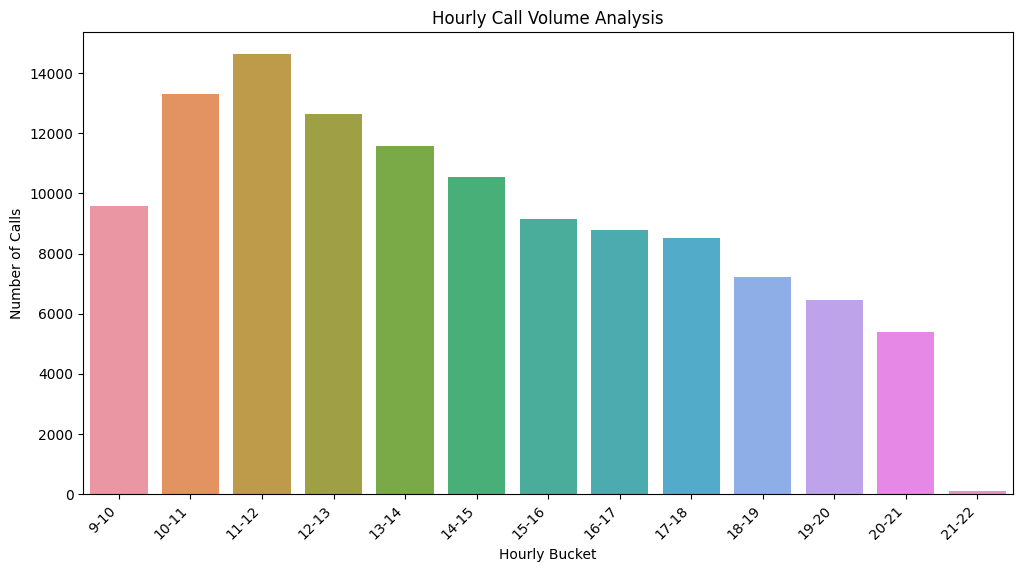

In [12]:
# Visualize the results using a bar plot with the specified order
plt.figure(figsize=(12, 6))
sns.barplot(x='Hourly_Bucket', y='Call_Status', data=hourly_call_volume, order=time_bucket_order)
plt.title('Hourly Call Volume Analysis')
plt.xlabel('Hourly Bucket')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


# Manpower Planning

In [18]:
# Assuming df is your DataFrame with relevant columns
# Convert 'Date_&_Time' to datetime format and create 'Time_Bucket'
df['Date_&_Time'] = pd.to_datetime(df['Date_&_Time'])
df['Time_Bucket'] = df['Date_&_Time'].dt.hour

# Calculate the total calls and abandoned calls per time bucket
total_calls_per_bucket = df.groupby('Time_Bucket').size()
abandoned_calls_per_bucket = df[df['Call_Status'] == 'abandon'].groupby('Time_Bucket').size()

# Calculate the target answer rate (complement of the target abandon rate)
target_answer_rate = 1 - 0.10  # 90%

# Calculate the minimum number of agents needed to achieve the target answer rate
required_agents_per_bucket = (total_calls_per_bucket / target_answer_rate).round().astype(int)

# Display the results in the desired format
result_df = pd.DataFrame({
    'Time_Bucket': required_agents_per_bucket.index.map(lambda x: f'{x}-{x+1}'),
    'Required_Agents': required_agents_per_bucket.values
})
print(result_df)



   Time_Bucket  Required_Agents
0         9-10            10653
1        10-11            14792
2        11-12            16251
3        12-13            14058
4        13-14            12846
5        14-15            11734
6        15-16            10177
7        16-17             9764
8        17-18             9482
9        18-19             8042
10       19-20             7181
11       20-21             5988
12       21-22              129


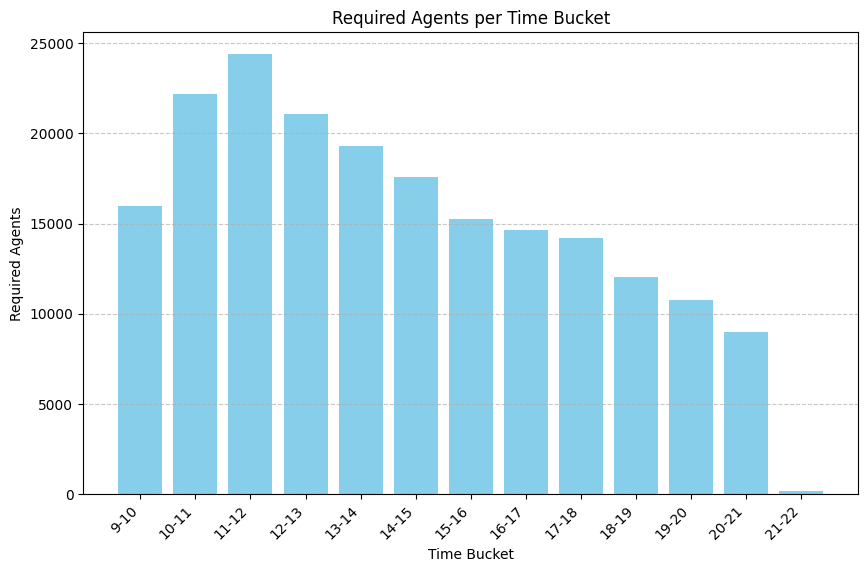

In [37]:
# Plotting a bar graph for required agents per time bucket
plt.figure(figsize=(10, 6))
plt.bar(result_df['Time_Bucket'], result_df['Required_Agents'], color='skyblue')
plt.title('Required Agents per Time Bucket')
plt.xlabel('Time Bucket')
plt.ylabel('Required Agents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Night Shift Manpower Planning:

In [24]:

# Assume night shift calls distribution (adjust percentages accordingly)
night_shift_calls_percentage = 0.30
night_shift_calls_per_bucket = (total_calls_per_bucket * night_shift_calls_percentage).round().astype(int)

# Calculate the additional agents needed for night shift calls
additional_agents_night_shift = (night_shift_calls_per_bucket / target_answer_rate).round().astype(int)

# Define different number of agents for day and night shifts
night_shift_agents_multiplier = 1.2  # Adjust this multiplier as needed

total_agents_required_night_shift = (additional_agents_night_shift * night_shift_agents_multiplier).round().astype(int)

result_df_night_shift = pd.DataFrame({
    'Time_Bucket': total_agents_required_night_shift.index.map(lambda x: f'{x}-{x+1}'),
    'Required_Agents': total_agents_required_night_shift.values,
    'Shift': 'Night'
})

print(result_df_night_shift)


   Time_Bucket  Required_Agents  Shift
0         9-10             3835  Night
1        10-11             5326  Night
2        11-12             5851  Night
3        12-13             5062  Night
4        13-14             4624  Night
5        14-15             4224  Night
6        15-16             3664  Night
7        16-17             3515  Night
8        17-18             3413  Night
9        18-19             2894  Night
10       19-20             2585  Night
11       20-21             2156  Night
12       21-22               47  Night


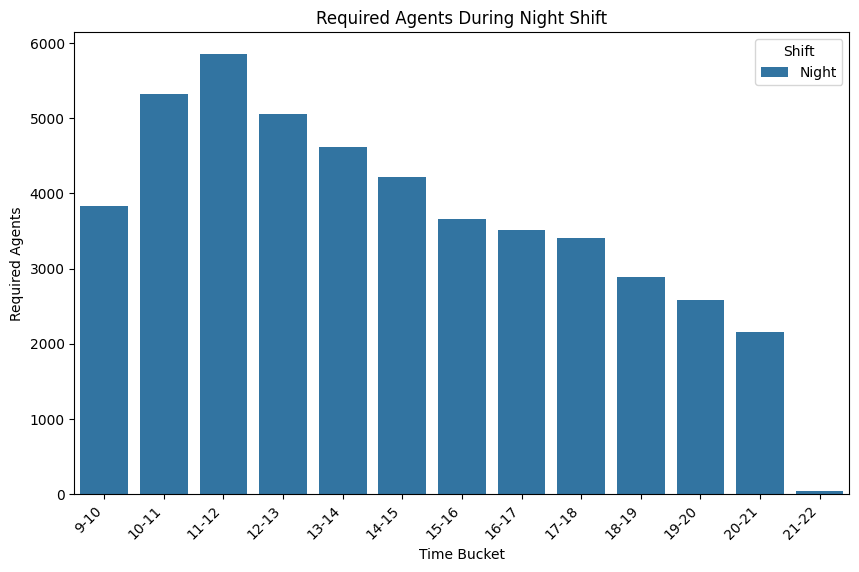

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the results in a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_Bucket', y='Required_Agents', hue='Shift', data=result_df_night_shift)
plt.title('Required Agents During Night Shift')
plt.xlabel('Time Bucket')
plt.ylabel('Required Agents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Shift')
plt.show()
